# METR3613: Meteorological Measurements, Dr. Scott Salesky 
## Homework Assignment 2: Basic Analysis of Mesonet Data with Python
The goal of this assignment will be to introduce you to basic data analysis, using the Python programming language and data from the Oklahoma Mesonet. This semester we will be using the iPython notebook environment, which will allow you to run Python code interactively in a web browser. The basics of running code in an iPython notebook, and a refresher on programming in Python has already been covered in the Help Session in class before this assignment.

### How to use this Notebook
Before you get started, you will have to download this iPython notebook to a folder on your computer where you can edit it. Rename the file as "HW2_LastName_FirstName.ipynb", as this is one of the files you will have to submit for your assignment. 

This iPython notebook has some cells the contain descriptive text, and others that contain Python code, which can be run directly in the web brower. Read the descriptions carefully, as they contain instructions for the assignment, and descriptions of what the code in each cell does. Also pay attention to comments in the Python code (lines that start with "#"), as these contain additional information about what the code does. If you double click a cell, you will be able to edit the contents. If you press Shift + Enter, this will execute the code in the cell. At a number of places in the Notebook, there is text that says **[TRY THIS]** where you can edit the code and explore the output. There are also a number of **Exercises** where you will have to edit / modify the code. New cells can be added by going to the Toolbar, then Cell -> Insert Cell (Above or Below). Homework problems you are expected to complete for this assignment can be found at the end of the notebook.

***

## Overview
Figures 1-4 below show time-series plots of air temperature, wind speed and wind direction, pressure, solar radiation, and rainfall recorded at the Norman Mesonet site on July 30, 2018. All time stamps are in UTC. In this assignment, you will be asked to recreate these plots (using some starter code provided below), and to modify the provided code to calculate hourly averages.
***

**Fig. 1** Temperatures at 2 m and 9 m above ground level measured at the Norman Mesonet site on July 30, 2018. 

<img src="Norman_temp_20180730.png" width=500></img>
***
**Fig. 2** Wind speed and direction at 10 m above ground level measured at the Norman Mesonet site on July 30, 2018.

<img src="Norman_ws_wd_20180730.png" width=500></img>
***
**Fig. 3** Atmospheric pressure measured at Norman Mesonet site on July 30, 2018.

<img src="Norman_press_20180730.png" width=500></img>
***
**Fig. 4** Incoming solar radiation and rainfall accumulated after midnight measured at Norman Mesonet site on July 30, 2018.

<img src="Norman_rad_rain_20180730.png" width=500></img>
***

## Downloading and reading Mesonet data
To get started, you will need to download the correct data file, available here from the [Mesonet archive](http://www.mesonet.org/data/basic/mesonet/mts). In particular, you will want to download ``20180730nrmn.mts``. Save the file (text file with extension .mts) in the folder you plan to work from in Python. Make sure the data file is in the same folder as this iPython notebook file ("HW2_starter_script.ipynb"). We will define a function below in Python, which will allow us to import the Mesonet data for analysis and plotting. Comments in the code (denoted with a #) provide more information about what the code is doing.

For more information on the Mesonet data files, please see the following pages from the Mesonet:

[Air temperature measurements](https://www.mesonet.org/index.php/site/about/air_temperature_and_related_measurements)

[Wind measurements](https://www.mesonet.org/index.php/site/about/wind_measurements)

[Moisture measurements](https://www.mesonet.org/index.php/site/about/moisture_measurements)

[Soil temperature measurements](https://www.mesonet.org/index.php/site/about/soil_temperature_measurements)

[Other measurements](https://www.mesonet.org/index.php/site/about/other_measurements)

In [4]:
def mesonet_importfile(filename):
    ''' 
    ----------------------------------------------------------------
    Author: Scott Salesky, University of Oklahoma
    Date: June 25, 2018
    ----------------------------------------------------------------
    Imports files containing 5-min average data from the Oklahoma Mesonet, available from
    http://www.mesonet.org/data/basic/mesonet/mts/. Skips header files, and reads in 
    all variables as strings. Numerical quantities are converted to floating point values
    before they are passed to the output variables.
    ----------------------------------------------------------------
    '''
    #Import Numerical Python package
    import numpy as np
    
    #Loads data from text file, skipping 3 header lines and removing whitespace.
    #All variables are loaded in string format.
    inputdata = np.genfromtxt(filename,skip_header=3,autostrip='True',dtype=str)

    print 'Importing ',filename

    # Pass data from inputdata array to variable names and convert all
    # quantities to floating point numbers except for the Station ID.
    # Note that in Python array indexing begins at 0 (like C), NOT at 1 (like Matlab or Fortran)
    STID = inputdata[:,0]                     #Station ID
    STNM = inputdata[:,1].astype(float)       #Station Number
    TIME = inputdata[:,2].astype(float)       #Time (UTC)
    RELH = inputdata[:,3].astype(float)       #Average relative humidity at 1.5m [%]
    TAIR = inputdata[:,4].astype(float)       #Average air temperature at 1.5m [degrees C]
    WSPD = inputdata[:,5].astype(float)       #Average wind speed at 10m [m/s]
    WVEC = inputdata[:,6].astype(float)       #Average vector wind speed at 10m [m/s]
    WDIR = inputdata[:,7].astype(float)       #Average wind direction at 10m [degrees, where north is 0 degrees]
    WDSD = inputdata[:,8].astype(float)       #Average wind direction standard deviation at 10m [degrees]
    WSSD = inputdata[:,9].astype(float)       #Average wind speed standard deviation at 10m [m/s]
    WMAX = inputdata[:,10].astype(float)      #Maximum wind speed observed in 5-min interval [m/s]
    RAIN = inputdata[:,11].astype(float)      #Cumulative rainfall since 0000 UTC [mm of water per day]
    PRES = inputdata[:,12].astype(float)      #Station pressure [mb]
    SRAD = inputdata[:,13].astype(float)      #Downwelling global solar radiation [W m^-2]
    TA9M = inputdata[:,14].astype(float)      #Same as TAIR, but measured at 9 m [degrees C]
    WS2M = inputdata[:,15].astype(float)      #Average wind speed at 2 m [m/s]
    TS10 = inputdata[:,16].astype(float)      #Soil temperature under sod at 10 cm [degrees C]
    TB10 = inputdata[:,17].astype(float)      #Soil temperature under bare soil at 10 cm [degrees C]
    TS05 = inputdata[:,18].astype(float)      #Soil temperature under sod at 5 cm [degrees C]
    TS25 = inputdata[:,19].astype(float)      #Soil temperature under sod at 25 cm [degrees C]
    TS60 = inputdata[:,20].astype(float)      #Soil temperature under sod at 60 cm [degrees C]
    TR05 = inputdata[:,21].astype(float)      #Calibrated Delta T of soil at 5 cm (used to calculate soil moisture) [degrees C]
    TR25 = inputdata[:,22].astype(float)      #Calibrated Delta T of soil at 25 cm [degrees C]
    TR60 = inputdata[:,23].astype(float)      #Calibrated Delta T of soil at 60 cm [degrees C]

    #Return a list of the Mesonet variables
    return [STID, STNM, TIME, RELH, TAIR, WSPD, WVEC, WDIR, WDSD, WSSD, WMAX, RAIN, 
            PRES, SRAD, TA9M, WS2M, TS10, TB10, TS05, TS25, TS60, TR05, TR25, TR60]


We will start with the main script that processes the Mesonet data. We first will import some of the Python packages that we will need for the code. Here we will import NumPy (the Numerical Python package), and Matplotlib (the Python plotting package). There is excellent documentation for both of these packages available online; see the following links for 
[NumPy](https://docs.scipy.org/doc/numpy/reference/) and for [Matplotlib](https://matplotlib.org/). Both contain examples of how to use different commands in the code, and the Matplotlib website has examples of many different kinds of plots you can make, and example code that you can use to generate them. 

In [5]:
#Import Python packages
import numpy as np                 #Numerical Python package
%matplotlib inline
import matplotlib.pyplot as plt    #Matplotlib, the Python plotting package
from matplotlib import rc          #Function that lets us control plot properties

Now, let's define a filename so our import function can load the Mesonet data file we want to analyze. This assumes that the Mesonet data file is in the directory in which you are working (so the code can see it). Otherwise 'filename' would have to be set to the full directory path to the file; see the example of this below.

In [23]:
filename = '20180730nrmn.mts'
#Note that if the mesonet file is not in the same directory as this file (HW_2_starter_script.ipynb),
#you will need to include the full path to the file in the filename like this:
#filename='/Users/salesky/work/METR3613/homework/hw2/20180730nrmn.mts'

Once "filename" is set, we are ready to use the ```mesonet_importfile()``` function that we just defined above. It has the ability to read in each column from the Mesonet data file. However, we don't need all of the variables for our analysis, and can skip unneeded ones by replacing them with an "_". 

In [7]:
#The import function reads in each colum in the Mesonet .mts file as a separate variable, 
#and should be called as follows:
# [STID, STNM, TIME, RELH, TAIR, WSPD, WVEC, WDIR, WDSD, WSSD, WMAX, RAIN, 
#        PRES, SRAD, TA9M, WS2M, TS10, TB10, TS05, TS25, TS60, TR05, TR25, TR60] = mesonet_importfile(filename)

# However, we don't need all the variables for our analysis. The variables that are not read in can be
# replaced by a _ when the function is called.

[STID, STNM, TIME, RELH, TAIR, WSPD, _, WDIR, _, _, _, RAIN, 
       PRES, SRAD, TA9M, WS2M, _, _, _, _, _, _, _, _] = mesonet_importfile(filename)

Importing  20180730nrmn.mts


We can check if we've read in the data successfully. We can print one of the variables to screen to make sure that the values make sense. 

In [8]:
print TAIR

[31.9 31.8 31.7 31.6 31.5 31.3 31.1 31.  30.9 30.7 30.5 30.4 30.3 30.2
 30.  29.8 29.6 29.3 29.2 29.  28.9 28.8 28.7 28.7 28.5 28.4 28.4 28.4
 28.3 28.1 28.  27.8 27.8 27.8 27.6 27.5 27.4 27.4 27.4 27.3 27.2 27.2
 27.1 27.  26.9 26.9 26.8 26.7 26.7 26.6 26.3 26.3 26.1 26.1 26.1 26.
 26.2 26.3 26.3 26.2 26.1 26.  26.2 26.1 26.  25.8 25.7 25.6 25.5 25.4
 25.4 25.3 25.2 25.3 25.2 25.3 25.4 25.3 25.3 25.3 25.3 25.3 25.2 25.2
 25.1 25.  25.1 25.1 25.  25.  25.1 25.  25.  25.1 25.1 25.1 25.1 25.1
 25.1 25.2 24.8 22.7 20.8 20.2 20.2 20.5 20.7 21.2 21.2 21.1 20.7 20.5
 20.4 20.4 20.4 20.4 20.3 20.2 20.3 20.3 20.3 20.2 20.1 20.2 20.1 20.
 19.9 19.9 20.  20.  19.9 19.8 19.8 19.8 19.8 19.8 19.8 19.8 19.8 19.8
 19.8 19.8 19.8 19.7 19.7 19.8 19.8 19.7 19.7 19.8 19.8 19.9 19.9 19.8
 19.9 19.9 20.  20.  20.1 20.2 20.2 20.2 20.2 20.2 20.3 20.3 20.4 20.4
 20.4 20.5 20.6 20.6 20.9 21.2 21.4 21.7 21.6 21.8 22.2 22.4 22.5 22.6
 23.3 23.4 23.3 23.4 23.8 24.  24.2 24.4 24.8 24.7 24.7 24.9 25.2 25.5
 25.6 25

If we look back at the ```mesonet_importfile()``` function, temperature should be given in degrees Celsius. So the values in this array make physical sense.

**[TRY THIS]** Print values of other variables to the screen in the cell below and make sure the values make sense. For more information on what the units should be for each variable, refer to the mesonet\_importfile() function above or the links that give information on the variables contained in the Mesonet data files.

In [9]:
#Print variables to screen here


***
## Data processing
Now that we have loaded a data file, we need to do some data processing before we can make plots of the variables we are interested in. In order to do this, we first need to replace any flagged or missing Mesonet data by NaN (not a number) for ease of computation and plotting:

In [10]:
#Note that np.nan is the NaN (not a number) value provided by NumPy
RELH[RELH<-100]=np.nan
TAIR[TAIR<-100]=np.nan
WSPD[WSPD<-100]=np.nan
WDIR[WDIR<-100]=np.nan
PRES[PRES<-100]=np.nan
SRAD[SRAD<-100]=np.nan
TA9M[TA9M<-100]=np.nan
WS2M[WS2M<-100]=np.nan

We also will need to convert time from minutes to hours to make the axis easier to read when we create plots. 

In [11]:
HOURS = TIME/60.

Next we will want to fine the u- and v- wind components from the wind speed and direction that are the variables we have from the Mesonet site. Note that the ```np.sin()``` and ```np.cos()``` are the sine and cosine functions from NumPy. 

In [12]:
u = -WSPD*np.sin(WDIR*np.pi/180.)
v = -WSPD*np.cos(WDIR*np.pi/180.)

### Computing averages
This next block of code prepares to calculate hourly averages from the Mesonet data (in the file you downloaded, you have 5-minute averages). 

For the sake of simplicity, let's suppose that an hour starts on the hour (11:00) and ends at 55 minutes after the hour (11:55) to prevent double counting of the hour marks! We're going to store the hourly averages at the center of the hour (so that the average between 11:00 and 12:00 will be stored at 11:30). Let's build a list of half hours to do this. 

In [13]:
#This creates a linearly spaced array from 0.5 to 24 at increment 1.0
avg_times = np.arange(0.5,24.0,1.0)

#Let's print to screen to make sure the array values make sense.
print avg_times

[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5 20.5 21.5 22.5 23.5]


The ```avg_times``` array has values [0.5, 1.5, ..., 23.5], which is exactly what we want. 

Next we will need to allocate variables for the hourly-averaged u and v wind components. Here we are creating empty arrays that are the correct size to store our hourly averages that we will calculate below. 

In [14]:
#Allocate variables
#The np.zeros() function creates an empty array the same size as the avg_times array we just created. 
#The dtype='float' command means that variables in this list are floating point (real) numbers, rather than integers.
hourlyu = np.zeros(len(avg_times),dtype='float')    #Creates a variable with same shape as avg_times
hourlyv = np.zeros(len(avg_times),dtype='float')    #Creates a variable with same shape as avg_times

Let's print some values to screen to make sure we created the arrays correctly.

In [15]:
print 'The length of hourlyu is:', len(hourlyu)
print 'hourlyu:', hourlyu

The length of hourlyu is: 24
hourlyu: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


We now will calculate hourly-averaged values of the u and v wind components. The average we will compute below is a "window average" meaning that we will need to figure out which points to begin and end the sum for the average. For an hourly average with 5-minute data, we will want a 12-point window (e.g. 0-55, 5-115, etc.) We will accomplish this with a start and stop counter for indexing the variable, and use the ```np.nanmean()``` function (which ignores NaN values, in case we have bad or missing data).

Note that a loop in Python begins with "for" and then defines a range of values that we will loop over. Here we loop from 0 to the length of the avg\_times array. Also note that the "for" command must end with a colon (:) and the commands within the loop are indented. We do not have to have an "end" command to exit the loop. Python just understands that when values are no longer indented, we are outside the loop. 

**[TRY THIS]** Uncomment the "print i, start, stop" line in the code below to see which values these variables take on at each iteration of the loop. 

In [16]:
#Initialize start counter
start = 0

#Loop over averaging times
for i in range(0,len(avg_times)):
    
    #Define stop counter for this iteration
    stop = start + 11

    #print i, start, stop
    
    #Calculate hourly averages within window
    hourlyu[i] = np.nanmean(u[start:stop])
    hourlyv[i] = np.nanmean(v[start:stop])
    start = stop + 1
    
    #This is inside the loop

#This is outside the loop

Let's print values of 'hourlyu' to the screen to make sure our values are reasonable for the u wind component. 

In [17]:
print hourlyu

[-4.14734659 -4.12860574 -3.99862384 -3.75103627 -3.44805682 -3.72679265
 -4.1761881  -3.9956912   2.65939513 -3.99181269 -2.07310294 -1.66352406
  0.42757123  0.09438467  0.27387322  0.20180748  1.67874637  1.72138892
  3.12644192  3.4055376   4.1082595   4.55617996  2.78090562 -2.8300526 ]


## Exercise 1:
Add lines of code in the loop above to compute the other averages that you need! Remember to think carefully about how you should calculate hourly averages of the wind direction.
***

## Plotting

Now we move on to plotting. The code below gives examples that allow you to recreate Figures 3 and 4 displayed above. 

### Plotting pressure
Let's first recreate the plot from Figure 3 that is displayed above. This is a timeseries line of atmospheric pressure, measured at the Norman Mesonet station. First we will call the ```plt.figure()``` command, which creates and empty figure, and allows us to set some options for what the figure will look like. Here we are setting the figure size to 8"x6", the resolution to 900 dots per inch, no background color (this is the ```facecolor="None"``` command) and the default linewidth to 2. We also define the default font style and size, and the resolution we will use when making plots. The quantity "f1" is a figure handle, which allows us to refer to the figure we created in the code. 

In [18]:
#This creates a figure, and sets defaults for what the figures will look like. 
f1 = plt.figure(figsize=(8,6),dpi=900,facecolor=None,linewidth=2.0)#Default figure size, resolution, and line width 
rc('font',weight='normal',size=12,serif='Computer Modern Roman') #Default font settings
rc('savefig',dpi=900)                                            #Default resolution when saving plots

<Figure size 7200x5400 with 0 Axes>

Now that we have created an empty figure object, we move on to plotting. The ```plt.plot()``` command tells Matplotlib what to actually draw on your figure. You provide ```plt.plot()``` an x-vector and a y-vector to plot; in our case these are "HOURS" and "PRES." The third argument inside the plot command sets the line style. In this case, we choose "b-", which is a solid blue line. The options for different lines styles are available from the Matplotlib [here](https://matplotlib.org/gallery/lines_bars_and_markers/line_styles_reference.html). More information on color options in Matplotlib are available [here](https://matplotlib.org/2.0.2/api/colors_api.html). 

The next command lets use specify what type of marker we want to use on the plot. If we don't specify the marker, we will just have a solid line. Here we use ```marker='s'```, which uses a square to plot at the location of each data point. However, other types of markers are available. For a list, see [this link](https://matplotlib.org/api/markers_api.html). Finally we set the linewidth to 1 (```lw=1.0```), the marker size to 2 (```ms=2```) and the label for the line on the plot to ```'Atm. Pressure'```.

The following commands adjust features to make our plot look nice. The ```plt.title()``` command specifies the title for our plot. The ```plt.legend()``` command creates a legend located in the upper left corner of the plot. The ```plt.xlim()``` and ```plt.ylim()``` commands specify the maximum and minimum values on the x- and y- axes. The ```plt.xlabel()``` and ```plt.ylabel()``` commands allow us to label and x- and y-axes. And the ```plt.savefig()``` command saves the figure to a file in png format, with the filename ```"Norman_press_20180624.png"```. Be sure to use a filename that is unique, so you don't overwrite the previous figure. If you do not include the full file path here, Python will save the figure in the directory in which you are working. 

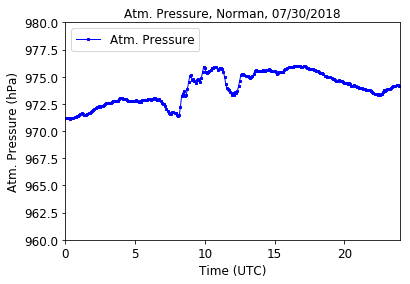

In [19]:
#Plot pressure vs. time in hours. The line style is controlled by the 'b-' and
# the markers (squares in this case) are controlled by the marker='s'.
plt.plot(HOURS,PRES,'b-',marker='s',lw=1.0,ms=2,label='Atm. Pressure')

# Set the title of the plot
plt.title('Atm. Pressure, Norman, 07/30/2018',fontsize=12)

# Add a legend to the plot, where the line labels are the values specified in 'label' above
plt.legend(loc='upper left',fontsize=12)

#Set x- and y-limits of the plot
plt.xlim([0,24])
plt.ylim([960,980])

#Label x and y axes
plt.xlabel('Time (UTC)',fontsize=12)
plt.ylabel('Atm. Pressure (hPa)',fontsize=12)

#Save figure to file in png format, with filename 'Norman_press_20180624.png'
plt.savefig('Norman_press_20180730.png',format='png',bbox_inches='tight')
plt.show()

This file should have been saved to your directory, as 'Norman_press_20180624.png.' Check to make sure you have this file, and can open it. 

### Plotting solar radiation and rainfall
Now, let's recreate Figure 4 (solar radiation and rainfall) that is displayed above. This is a timeseries plot of radiation and rainfall from the Norman Mesonet station. This figure is a bit different, since it has 2 y-axes! The command ```ax2=ax1.twinx()``` creates a right y-axis that shares the same x-axis and can be used for plotting. Note that in this example the axis labels are set a little differently than what we did before. See the comments in the code below for more information on what it is doing. 

There is also more information from the Matplotlib documentation [here](https://matplotlib.org/2.0.1/examples/api/two_scales.html) that shows how to use the ```ax.twinx()``` command to create a second y-axis and to use it for plotting variables. 

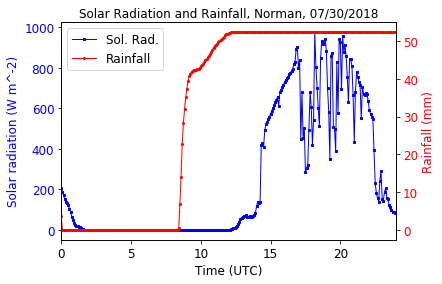

In [20]:
#We need to set up this plot a bit differently. 

#Create an empty figure and axis ax1
fig, ax1 = plt.subplots()

#Plot solar radiation on the left y-axis
ax1.set_ylabel('Solar radiation (W m^-2)',color='b')    #Sets label for left y-axis in blue
ax1.set_xlabel('Time (UTC)')                            #Sets the x-axis label
ln1=ax1.plot(HOURS,SRAD,'b-',marker='s',lw=1,ms=2)      #Plot radiation using left y-axis
ax1.tick_params(axis='y',labelcolor='b')                #Use blue for tick labels on left y-axis
plt.xlim([0,24])                                        #Set limits for the x-axis

#Create the right y-axis that shares the same x-axis
ax2=ax1.twinx()

#Plot rainfall on the right y-axis
ln2=ax2.plot(HOURS,RAIN,'r-',marker='o',lw=1,ms=2)                          #Plot rainfall using right y-axis that you just created.
ax2.set_ylabel('Rainfall (mm)',color='r')                                   #Set right y-axis label in red
ax2.tick_params(axis='y',labelcolor='r')                                    #Set ticks on right y-axis in red
plt.title('Solar Radiation and Rainfall, Norman, 07/30/2018',fontsize=12)   #Plot title
lns=ln1+ln2                                                                 #Combine lines from left and right y-axes so we can create the legend
labels=('Sol. Rad.','Rainfall')                                             #Labels for the legend
plt.legend(lns,labels,loc='upper left',fontsize=12)                         #Create legend

plt.savefig('Norman_rad_rain_20180730.png',format='png',bbox_inches='tight')#Save figure to png format 
plt.show()

## Exercise 2
Recreate figures 1 and 2 that are displayed above. Follow the instructions below about the additional data to include on these plots. Also be sure to do all of the analysis required to answer all of the questions below. 

In [21]:
#Add code to create Figure 1 here:






In [22]:
#Add code to create Figure 2 here:






## Homework problems
Solve the following problems:

1. Using Figures 1-4, provide a brief summary (short paragraph) of the weather events for the day, including justifications for your thoughts based on the given plots. Remember to include time of occurrence for any events that you choose to discuss. You should access other data sources (e.g. archived radar data and synoptic maps) and include any additional information about that day that you think might be important for your discussion. Also, discuss how the temperatures at the 2 measurement heights compare and if the observations agree with expected trends (**15 pts**). <br><br>

2. Reproduce Fig. 1 and 2 by writing your own Python code below. Each figure should be saved as a separate file, and your figures should include a legend, axis titles, and axis labels as shown in Fig. 1 and 2. Make sure that everything is readable (**25 pts**). <br><br>

3. Calculate hourly averages of wind direction, wind speed, temperature at 1.5 m and temperature at 9 m. Consider an hour to begin at :00 and to end at :55. The provided starter script provides example computations of hourly averages of u- and v-wind components (**25 pts**). Please be careful how you calculate the average wind directions, make sure to follow the approach presented in the help sessions. <br><br>

4. Produce a new version of your Fig. 1 including the hourly averaged temperature data, and a new version of your Fig. 2 including the hourly wind direction and wind speed data. Please plot the hourly averages at :30 past the hour. Save these as separate figures from the ones you produced in task b) (**20 pts**). <br><br>

5. Discuss any differences you notice between the raw data and the hourly averages that you plotted in d). Explain why you think these discrepancies exist (**10 pts**). <br><br>

6. Place all your files (i.e., your own Python notebook as a .ipynb file, and all of the figures you produced) in a zip file (**5 pts**)

### Expected format for the submitted assignment

You should submit a text document (in .doc or .pdf format) **and** your zip file (containing your edited matlab script as a .m file and the 4 figures you produced) to the assignment on Canvas. The text document should contain the answers to the questions above, and in your discussion you should refer to the figure numbers. In particular, the answers to questions #1 and #5 should be clearly written, using complete sentences and following the rules of English grammar. Missing or unreadable plot components, such as axis titles, axis labels, legends, or data, typically each result in a 2-pt reduction. 

**The deadline for submitting your documents is Wednesday, October 3, 2018 at 11:59 pm. The assignment will close at this time and late submissions by email will only be accepted under extraordinary circumstances.**

### Helpful tips
If you have questions about creating plots in Matplotlib (the Python plotting package), the online documentation is a great place to start before asking your TA or instructor for help. A very good tutorial can be found [here]( https://matplotlib.org/users/pyplot_tutorial.html); however, there are many other useful pages on [the Matplotlib website](https://matplotlib.org). **Please also see the Python tutorials that are posted on Canvas for additional help with Python syntax and plotting.**